**Pré-processamento e Limpeza dos Dados**

In [189]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

# Carregar os dados
df = pd.read_csv('/content/all_agricultural_products_data.csv')

#Ordenar por data
df = df.sort_values('date')

# Verificar estrutura dos dados
print(df.info())
print(df.head())

# Converter a coluna date para datetime
df['date'] = pd.to_datetime(df['date'])

# Verificar valores ausentes
print(df.isnull().sum())

# Verificar duplicatas
print(df.duplicated().sum())

# Verificar estatísticas descritivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 30931 entries, 0 to 30930
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     30931 non-null  object 
 1   commodity  30931 non-null  object 
 2   date       30931 non-null  object 
 3   open       30931 non-null  float64
 4   high       30931 non-null  float64
 5   low        30931 non-null  float64
 6   close      30931 non-null  float64
 7   volume     30931 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 2.1+ MB
None
      ticker commodity        date   open   high    low  close  volume
0       CC=F     Cocoa  2000-01-03 840.00 846.00 820.00 830.00    2426
12271   CT=F    Cotton  2000-01-03  50.43  51.10  50.35  51.07    8033
6137    KC=F    Coffee  2000-01-03 124.00 124.00 116.10 116.50    6640
6138    KC=F    Coffee  2000-01-04 116.50 120.50 115.75 116.25    5492
12272   CT=F    Cotton  2000-01-04  50.90  50.97  50.25  50.73    4709
tick

**Análise Temporal dos Preços**

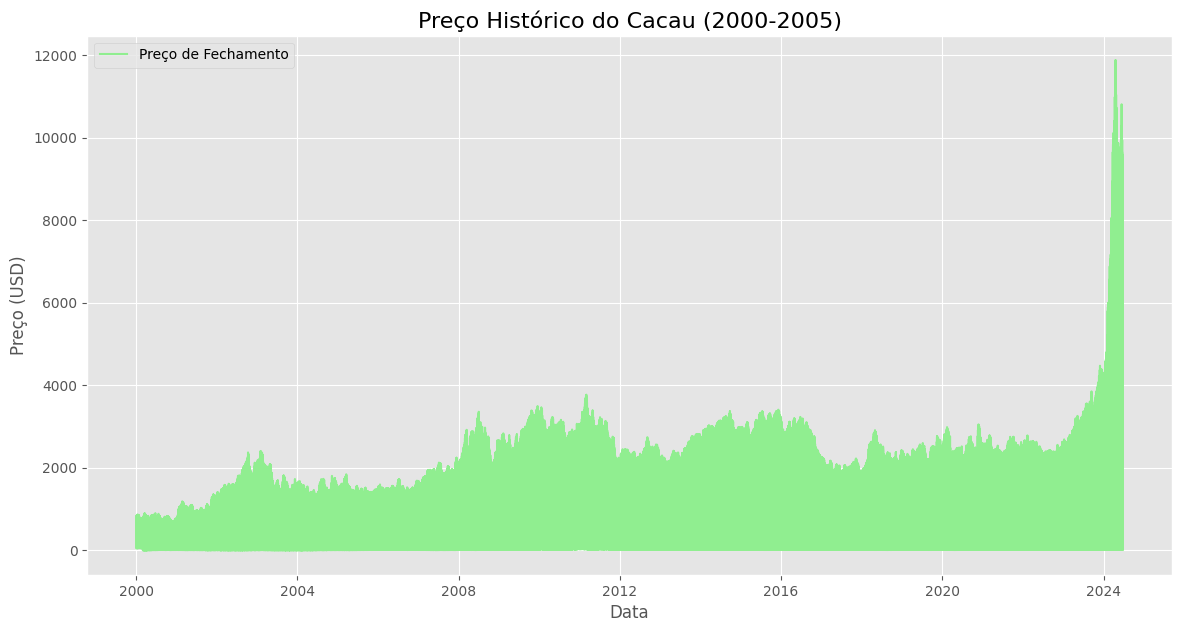

In [190]:
# Configuração do estilo dos gráficos
plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

# Gráfico de linha dos preços de fechamento ao longo do tempo
plt.plot(df['date'], df['close'], label='Preço de Fechamento', color='lightgreen')
plt.title('Preço Histórico do Cacau (2000-2005)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True, alpha=1)
plt.legend()
plt.show()

**Análise de Volatilidade**

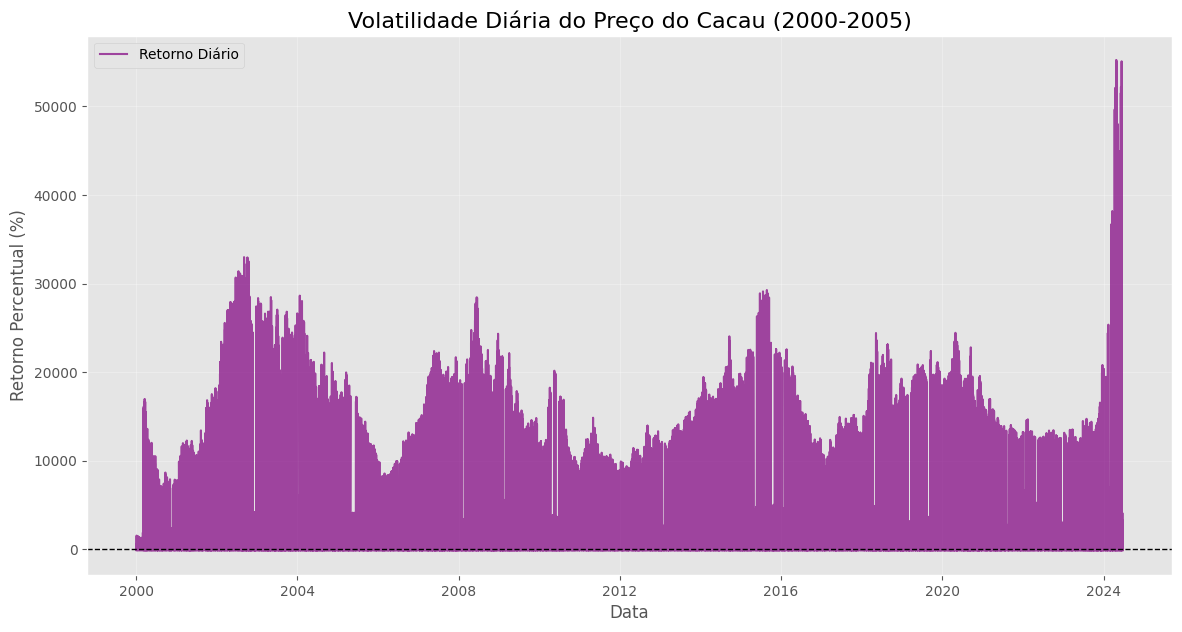


Estatísticas de Volatilidade:
Média de retorno diário: 1229.29%
Desvio padrão (volatilidade): 3806.72%
Retorno máximo em um dia: 55204.12%
Retorno mínimo em um dia: -99.82%


In [191]:
# Calcular retornos diários
df['daily_return'] = df['close'].pct_change() * 100

# Gráfico de volatilidade
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['daily_return'], label='Retorno Diário', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Volatilidade Diária do Preço do Cacau (2000-2005)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Percentual (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Estatísticas de volatilidade
print("\nEstatísticas de Volatilidade:")
print(f"Média de retorno diário: {df['daily_return'].mean():.2f}%")
print(f"Desvio padrão (volatilidade): {df['daily_return'].std():.2f}%")
print(f"Retorno máximo em um dia: {df['daily_return'].max():.2f}%")
print(f"Retorno mínimo em um dia: {df['daily_return'].min():.2f}%")

**Análise Sazonal e de Tendências**

<Figure size 1400x1000 with 0 Axes>

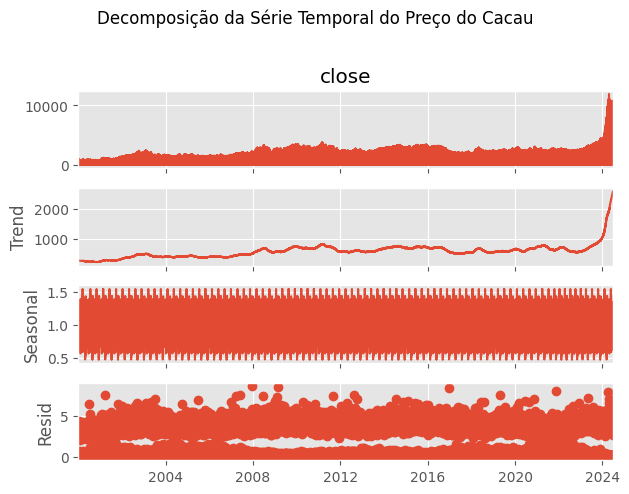

In [192]:
# Decomposição temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Criar série temporal com frequência diária
ts = df.set_index('date')

# Preencher valores ausentes com interpolação
ts = ts.interpolate(method='time')

# Decomposição
result = seasonal_decompose(ts['close'], model='multiplicative', extrapolate_trend='freq', period=365)

# Plotar decomposição
plt.figure(figsize=(14, 10))
result.plot()
plt.suptitle('Decomposição da Série Temporal do Preço do Cacau', y=1.02)
plt.tight_layout()
plt.show()

**Análise de Volume de Negociação**

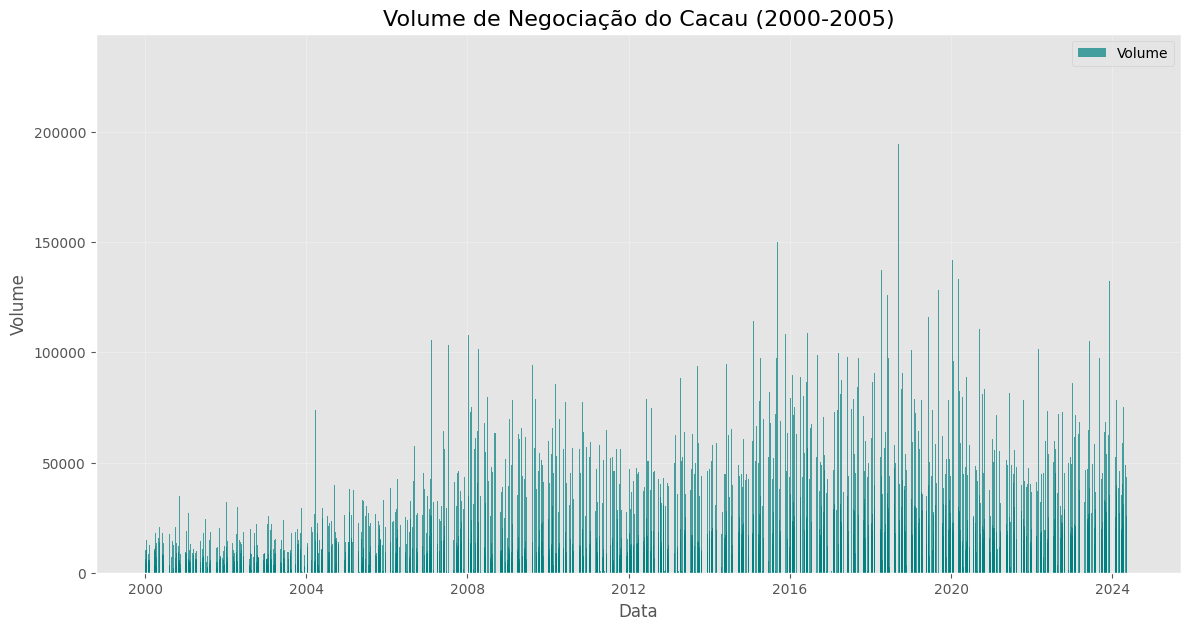


Correlação entre preço e volume: -0.16


In [193]:
# Volume de negociação ao longo do tempo
plt.figure(figsize=(14, 7))
plt.bar(df['date'], df['volume'], color='teal', alpha=0.7, label='Volume')
plt.title('Volume de Negociação do Cacau (2000-2005)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Correlação entre volume e preço
correlation = df[['close', 'volume']].corr().iloc[0,1]
print(f"\nCorrelação entre preço e volume: {correlation:.2f}")

**Análise de Máximas e Mínimas**

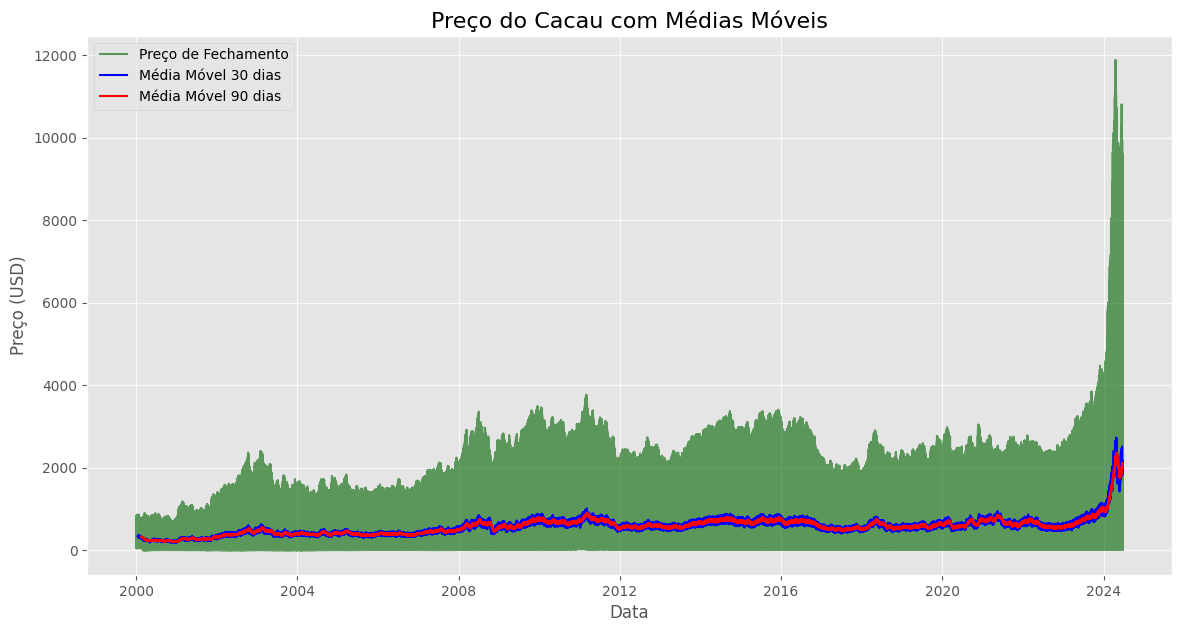

In [194]:
# Análise de range diário
df['daily_range'] = df['high'] - df['low']
df['range_pct'] = (df['daily_range'] / df['close']) * 100

# Médias móveis
df['30_day_avg'] = df['close'].rolling(window=30).mean()
df['90_day_avg'] = df['close'].rolling(window=90).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Preço de Fechamento', color='darkgreen', alpha=0.6)
plt.plot(df['date'], df['30_day_avg'], label='Média Móvel 30 dias', color='blue')
plt.plot(df['date'], df['90_day_avg'], label='Média Móvel 90 dias', color='red')
plt.title('Preço do Cacau com Médias Móveis', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True, alpha=0.8)
plt.legend()
plt.show()

**Análise por Ano**


Estatísticas por Ano:
        mean     std   min      max
year                               
2000  245.06  308.04  4.96   903.00
2001  280.68  390.36  6.15  1355.00
2002  415.26  667.36  4.99  2374.00
2003  429.59  675.79  5.67  2409.00
2004  403.34  567.82  5.36  1806.00
2005  396.50  552.82  8.08  1844.00
2006  394.72  563.30  9.75  1729.00
2007  464.23  716.18  8.45  2246.00
2008  604.97 1001.88  9.52  3360.00
2009  635.96 1093.73 11.43  3498.00
2010  693.50 1130.17 13.67  3461.00
2011  717.19 1118.72 20.47  3774.00
2012  582.18  890.06 18.54  2744.00
2013  595.48  917.74 15.89  2821.00
2014  723.62 1150.29 13.50  3371.00
2015  714.48 1196.41 10.39  3410.00
2016  674.92 1100.60 12.52  3235.00
2017  522.52  754.10 12.55  2262.00
2018  595.75  879.21  9.90  2914.00
2019  587.51  910.58 10.76  2766.00
2020  644.24  961.03  9.21  3054.00
2021  694.36  927.22 14.71  2785.00
2022  620.15  865.44 17.40  2786.00
2023  752.74 1250.94 18.96  4475.00
2024 1702.98 3223.24 18.13 11878.00


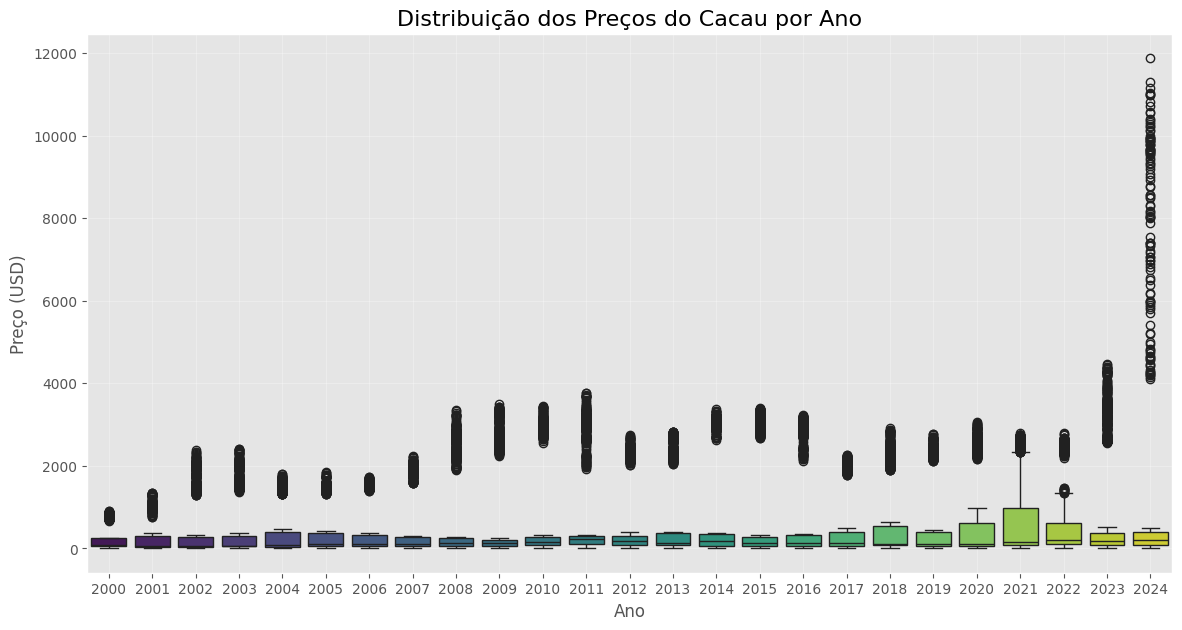

In [195]:
# Extrair ano da data
df['year'] = df['date'].dt.year

# Estatísticas por ano
yearly_stats = df.groupby('year')['close'].agg(['mean', 'std', 'min', 'max'])
print("\nEstatísticas por Ano:")
print(yearly_stats)

# Boxplot por ano
plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='close', data=df, palette='viridis')
plt.title('Distribuição dos Preços do Cacau por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

**Identificação de Eventos Extremos**

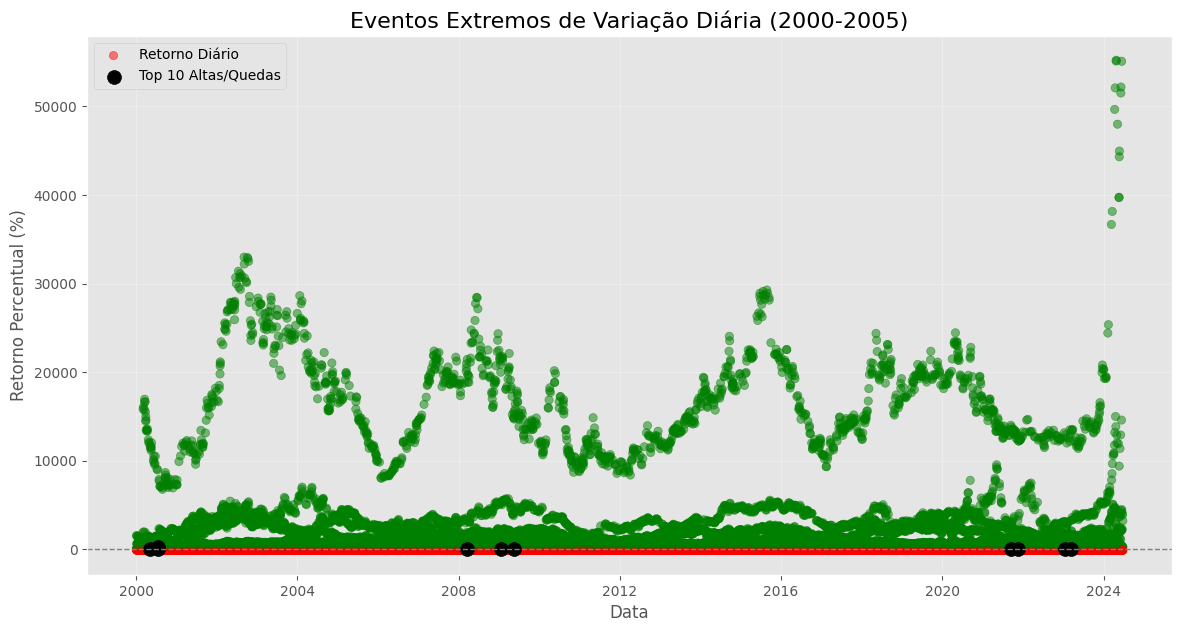

|       | date                |   close |   daily_return |
|------:|:--------------------|--------:|---------------:|
| 18407 | 2000-07-17 00:00:00 |  251.5  |       247.328  |
| 23712 | 2021-09-16 00:00:00 |  593.9  |        30.6998 |
| 24876 | 2000-05-01 00:00:00 |    6.53 |        26.5504 |
| 24088 | 2023-03-16 00:00:00 |  438.6  |        26.2158 |
| 24047 | 2023-01-17 00:00:00 |  429.9  |        24.9709 |
| 23755 | 2021-11-16 00:00:00 |  667    |        24.4403 |
| 20526 | 2009-01-16 00:00:00 |  170    |        19.6341 |
| 20609 | 2009-05-18 00:00:00 |  181.2  |        18.4314 |
| 20338 | 2008-03-17 00:00:00 |  222.4  |        18.2979 |
|  6272 | 2000-07-18 00:00:00 |  116.5  |        18.0943 |


In [196]:
plt.figure(figsize=(14, 7))

# Plotar todos os retornos diários
plt.scatter(df['date'], df['daily_return'],
            c=np.where(df['daily_return']>0, 'green', 'red'),
            alpha=0.5, label='Retorno Diário')

# Destacar eventos extremos
plt.scatter(extreme_days['date'], extreme_days['daily_return'],
            color='black', s=100, label='Top 10 Altas/Quedas')

# Configurações do gráfico
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Eventos Extremos de Variação Diária (2000-2005)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Percentual (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

# Exibir tabela com os eventos
print(extreme_days[['date', 'close', 'daily_return']].to_markdown())

**Análise de Correlação entre Variáveis**

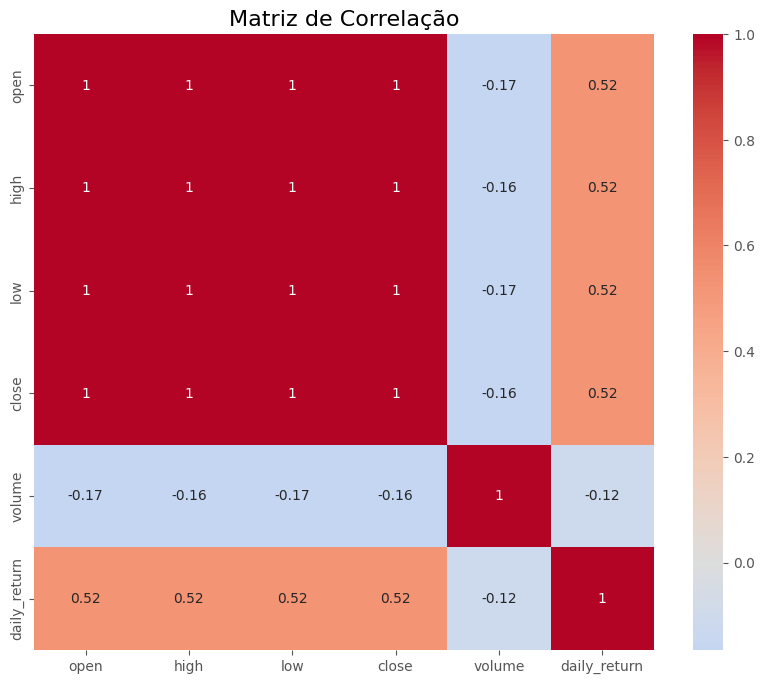

In [197]:
# Matriz de correlação
corr_matrix = df[['open', 'high', 'low', 'close', 'volume', 'daily_return']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

**MACHINE LEARNING - PREVISÃO DE SÉRIES TEMPORAIS**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjymwwnpg/wpbkqnf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjymwwnpg/gmpdpeih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81543', 'data', 'file=/tmp/tmpjymwwnpg/wpbkqnf1.json', 'init=/tmp/tmpjymwwnpg/gmpdpeih.json', 'output', 'file=/tmp/tmpjymwwnpg/prophet_modelg9jz1637/prophet_model-20250412183933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



=== DESEMPENHO DOS MODELOS ===
XGBOOST    | MAE: $892.39 | RMSE: $1387.31 | Error: 115.1%
PROPHET    | MAE: $740.74 | RMSE: $1505.55 | Error: 95.5%
HÍBRIDO    | MAE: $813.96 | RMSE: $1357.44 | Error: 105.0%
NAIVE      | MAE: $1246.94 | RMSE: $2107.22 | Error: 160.8%


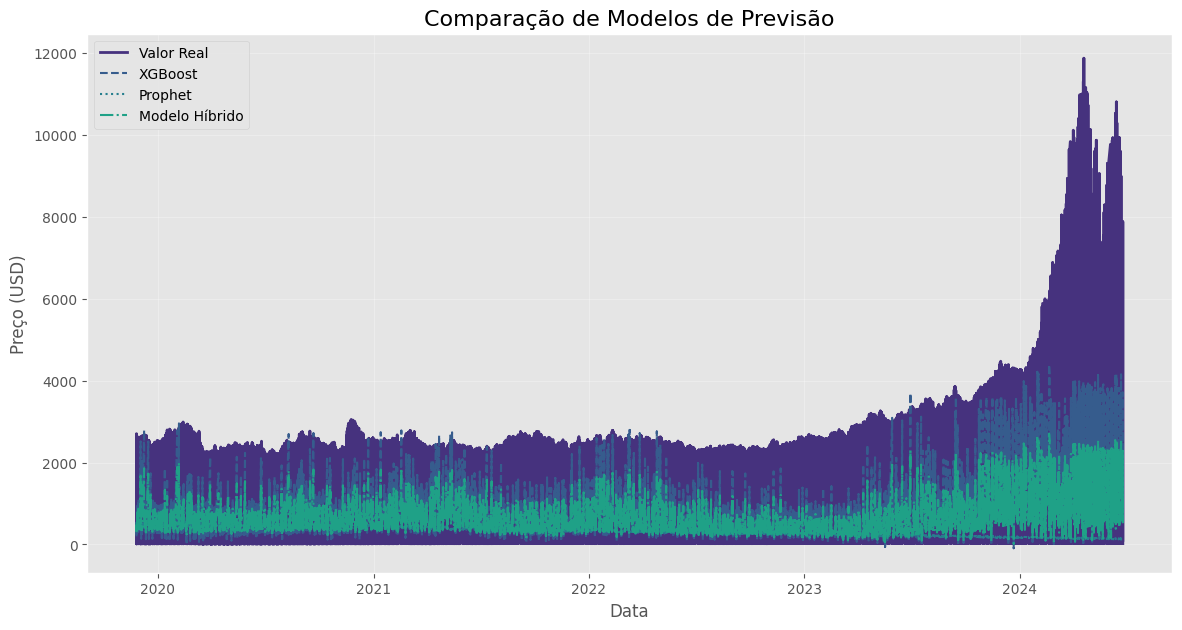

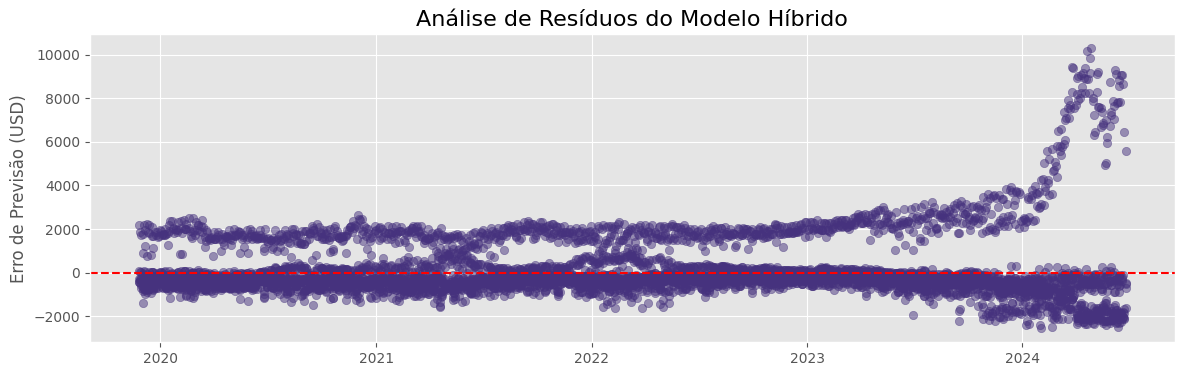

In [198]:
# ======================
# ANÁLISE EXPLORATÓRIA
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Configurações
# plt.style.use('seaborn')
sns.set_palette("viridis")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Carregar dados
df = pd.read_csv('all_agricultural_products_data.csv', parse_dates=['date'])
df = df.sort_values('date').set_index('date')

# Limpeza
df['daily_return'] = df['close'].pct_change() * 100
df = df.dropna()

# ======================
# ENGENHARIA DE FEATURES
# ======================
def create_features(df):
    # Lags e médias móveis
    df['lag_7'] = df['close'].shift(7)
    df['lag_30'] = df['close'].shift(30)
    df['rolling_avg_7'] = df['close'].rolling(7).mean()
    df['rolling_std_30'] = df['close'].rolling(30).std()

    # Features temporais
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day_of_week'] = df.index.dayofweek

    # Volatilidade
    df['range'] = df['high'] - df['low']
    return df.dropna()

df = create_features(df)

# ======================
# MODELAGEM
# ======================
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from prophet import Prophet

# Divisão temporal (80/20)
split_idx = int(len(df) * 0.8)
train, test = df.iloc[:split_idx], df.iloc[split_idx:]

# --- Modelo 1: XGBoost ---
features = ['lag_7', 'lag_30', 'rolling_avg_7', 'rolling_std_30', 'month']
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_model.fit(train[features], train['close'])
test['pred_xgb'] = xgb_model.predict(test[features])

# --- Modelo 2: Prophet ---
prophet_train = train.reset_index()[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
prophet_model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
prophet_model.fit(prophet_train)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)
test['pred_prophet'] = forecast.tail(len(test))['yhat'].values

# --- Modelo 3: Híbrido ---
test['pred_hybrid'] = 0.6*test['pred_xgb'] + 0.4*test['pred_prophet']

# ======================
# AVALIAÇÃO
# ======================
def evaluate_model(name, true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    error_pct = mean_absolute_error(true, pred) / true.mean() * 100
    print(f"{name.upper():<10} | MAE: ${mae:.2f} | RMSE: ${rmse:.2f} | Error: {error_pct:.1f}%")

print("\n=== DESEMPENHO DOS MODELOS ===")
evaluate_model("XGBoost", test['close'], test['pred_xgb'])
evaluate_model("Prophet", test['close'], test['pred_prophet'])
evaluate_model("Híbrido", test['close'], test['pred_hybrid'])

# Benchmark ingênuo
test['pred_naive'] = test['close'].shift(1)
evaluate_model("Naive", test['close'].iloc[1:], test['pred_naive'].dropna())

# ======================
# VISUALIZAÇÃO
# ======================
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['close'], label='Valor Real', linewidth=2)
plt.plot(test.index, test['pred_xgb'], label='XGBoost', linestyle='--')
plt.plot(test.index, test['pred_prophet'], label='Prophet', linestyle=':')
plt.plot(test.index, test['pred_hybrid'], label='Modelo Híbrido', linestyle='-.')
plt.title('Comparação de Modelos de Previsão', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ======================
# ANÁLISE DE ERROS
# ======================
test['residual'] = test['close'] - test['pred_hybrid']

plt.figure(figsize=(14, 4))
plt.scatter(test.index, test['residual'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos do Modelo Híbrido', fontsize=16)
plt.ylabel('Erro de Previsão (USD)')
plt.show()